# Step-1: Determining the objective

## Problem Statement
- An education comapny selling X education wants to improve it's lead conversion rates. In order to do this, the company would like to predict the customers that are most favourable to take up the courses on their platform and categorize them a 'hot leads' thus allowing them to focuss primarily on those leads rather than spending resources on unfruitful leads.
- Our objective in this project is to help the company to select the most promising leads by creating a model that assigns a lead score to each of the leads, wherein the highest scored lead has a high change of conversion and the lowest scored lead has a low chance of conversion. The CEO had given a ballpark lead conversion rate to be around 80% of the total leads generated.

# Step-2: Data Collection

In [1]:
#importing modules

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#modules for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting plot style
plt.style.use('seaborn-darkgrid')

In [2]:
#reading the dataset and displaying the first 5 data points
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Here the variable `'Converted'` is our target variable and the rest are our input variables.

# Step-3: Data Pre-processing

### Exploring the Dataset

In [3]:
#checking the statistics of the dataset
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
#checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Here object, int and float data types exist this confirms that some data type conversion is required in the data celaning step

- The features with object data type have to converted into a format that can be analyzed, for this we will encode the these categorical values

- Also, there are few missing values in the dataset which calls for the need to handling these missing values. We'll do this in the Data pre-processing step. But first let us check the missing value percentage in each column


<b> To counter the above points, we will follow the below steps: <br>
1)Encoding the categorical values: <br> </b>
    - Converting features into 0's and 1's, wherever appropriate <br>
    - Creating dummy variables for features with more than two categories <br>
<b>2)Handling missing values: </b> <br>
    - check for missing value percentage in each feature<br>
    - drop features with excessive missing values<br>
    - check for different terms in the feature columns that denote missing values<br>
    - impute missing values in remaing feature columns

### Encoding Categorical variables

#### Encoding Binary categorical variables into 0's and 1's

In [5]:
#assigning all the categorical columns into a single list
# categories with 'yes', 'no' classes
binary_cat_list = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
                   'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview']
# categories with multiple categories
multi_cat_list = ['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                 'How did you hear about X Education','What is your current occupation',
                 'What matters most to you in choosing a course','Tags','Lead Quality',
                 'Lead Profile','City','Asymmetrique Activity Index',
                 'Asymmetrique Profile Index','Last Notable Activity']

In [6]:
# checking for percentage of values other than 'Yes' or 'No' in the binary_cat_list columns
for feature in binary_cat_list:
    print('{0} :\n\n {1}'.format(feature, round(100*data[feature].value_counts(normalize=True),2)))
    print('****************************************************************************')

Do Not Email :

 No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64
****************************************************************************
Do Not Call :

 No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
****************************************************************************
Search :

 No     99.85
Yes     0.15
Name: Search, dtype: float64
****************************************************************************
Magazine :

 No    100.0
Name: Magazine, dtype: float64
****************************************************************************
Newspaper Article :

 No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64
****************************************************************************
X Education Forums :

 No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64
****************************************************************************
Newspaper :

 No     99.99
Yes     0.01
Name: Newspaper, dtype: float64
************

In [7]:
#converting the values in the 'Yes'/'No' class columns into 1's and 0's
for feature in binary_cat_list:
    data[feature] = data[feature].apply(lambda x: 1 if x=='Yes' else 0)
#checking the dataframe
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Looking at features with more than 2 classes

In [8]:
#checing for percentage of different types of values in other categorical columns
for feature in multi_cat_list:
    print('{0} :\n\n {1}'.format(feature, round(100*data[feature].value_counts(normalize=True),2)))
    print('**'*35)

Lead Origin :

 Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
**********************************************************************
Lead Source :

 Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64
**********************************************************************
Last Activity :

 Email Op

- in the above step we found out that there are several features having missing values termed has `Select`. We will now convert this `Select` values to `NaN`.

In [9]:
#converting 'Select' values to NaN
data = data.replace('Select', np.nan)
#checking the dataframe after the conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- It can be observed that several features indexed in the 'multi_cat_list' variable have several number of classes in them.  In order to analyze these classes inside the features, we need to determine which of them are important first and according create dummy variable which will make the analysis process easier.
- But prior to creating the dummy variables, it is essential to first handle the missing values and then do the Exploratory Data Analysis(EDA) which will help us determine which of these classes are significant to our analysis.
- Following this, we will be creating our dummy variables and accordingly proceed in our analysis and model building.

### Handling Missing Values

In [10]:
#checking missing values percentage in each feature
null_percent = round(100*(data.isnull().sum()/data.shape[0]),2)
null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
data.loc[:,list(null_percent>70)].columns

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

- the columns 'How did you hear about X Education', 'Lead Profile' can be dropped since they have more than 70% missing values and hence are insignificant in our analysis

In [12]:
#looking at the 'assymetrique' columns since they have about 45% missing data
x = ['Asymmetrique Activity Index','Asymmetrique Profile Index',
     'Asymmetrique Activity Score','Asymmetrique Profile Score']
for feature in x:
    print('{0} :\n\n {1}'.format(feature, round(100*data[feature].value_counts(normalize=True),2)))
    print('**'*35)

Asymmetrique Activity Index :

 02.Medium    76.44
01.High      16.35
03.Low        7.21
Name: Asymmetrique Activity Index, dtype: float64
**********************************************************************
Asymmetrique Profile Index :

 02.Medium    55.52
01.High      43.87
03.Low        0.62
Name: Asymmetrique Profile Index, dtype: float64
**********************************************************************
Asymmetrique Activity Score :

 14.0    35.26
15.0    25.75
13.0    15.43
16.0     9.30
17.0     6.95
12.0     3.90
11.0     1.89
10.0     1.14
9.0      0.18
18.0     0.10
8.0      0.08
7.0      0.02
Name: Asymmetrique Activity Score, dtype: float64
**********************************************************************
Asymmetrique Profile Score :

 15.0    35.03
18.0    21.33
16.0    11.93
17.0    11.53
20.0     6.13
19.0     4.88
14.0     4.50
13.0     4.06
12.0     0.44
11.0     0.18
Name: Asymmetrique Profile Score, dtype: float64
*****************************************

- The above 'asymmetrique' columns that denote an index and score assigned to each customer based on their activity and their profile, are not comprehensive, i.e., we are not able to determine as to how the variables can be used in our analysis. Moreover, their significance in this context cannot be determined. Also, since they have close to 50% null values, it is safe to drop these columns

In [13]:
# dropping the 'asymmetrique' and the columns having more than 70% null values
lst = ['How did you hear about X Education', 'Lead Profile',
       'Asymmetrique Activity Index','Asymmetrique Profile Index',
       'Asymmetrique Activity Score','Asymmetrique Profile Score']
data.drop(columns=lst, axis=1, inplace=True)

- Also, it can be observed that the feature 'Lead Quality' has about 51% null values.

In [14]:
100*(data['Lead Quality'].isnull().sum()/data['Lead Quality'].shape[0])

51.590909090909086

In [15]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

- Hence, to be on the safe side, let us replace these null values with 'Not Sure' since this feature determines the quality of the lead.

In [16]:
data['Lead Quality'].replace(np.nan, 'Not Sure', inplace=True)

In [17]:
#Checking the dataframe after modifications
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Now that we have dropped the features with excess null values, we will now process with handling the null values in other columns
- The null values in other columns will be handled by imputing the null values in the column with the mode of the column if the feature is categorical and, in case of a numerical column, with mean or other imputation methods according to the characteristics of the column. 

##### handling the missing values in the categorical columns

In [18]:
#since there the top columns in the specialization feature are almost equal,
## and the NaN values take up about 24% of the column, we'll replace the Nan values
### with 'Others' term.
data['Specialization'].replace(np.nan, 'Others', inplace=True)

#we'll replace the 'Country','Tags','City','What matters most to you in choosing a career',
## & 'what is your current occupation' features with mode or respective columns
data.Country.replace(np.nan,data.Country.mode()[0],inplace=True)
data.Tags.replace(np.nan,data.Tags.mode()[0],inplace=True)
data.City.replace(np.nan,data.City.mode()[0],inplace=True)
data['What matters most to you in choosing a course'].replace(np.nan,
    data['What matters most to you in choosing a course'].mode()[0],inplace=True)
data['What is your current occupation'].replace(np.nan,
    data['What is your current occupation'].mode()[0],inplace=True)

In [19]:
#checking missing values percentage in updated dataframe
null_percent = round(100*(data.isnull().sum()/data.shape[0]),2)
null_percent

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

- Now, since all the columns that have missing data contain negligible amount of missing values, it is safe to drop these rows from the data

In [20]:
#dropping rows with missing data
data.dropna(inplace=True)

#let us once again check the missing value percentage in each feature
null_percent = round(100*(data.isnull().sum()/data.shape[0]),2)
null_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

###### It can now be observed that there are no missing values in the data, and hence, all the missing values have been handled successfully.

# Step-4: Exploratory Data Analysis [EDA]

- Here, our target variable here is a binary variable. Therefore, let us first check for any class imbalances in the variable which might possibly affect our analysis.

In [21]:
#checking for class imbalances in 'Converted' variable.
round(100*(data['Converted'].value_counts(normalize=True)),2)

0    62.14
1    37.86
Name: Converted, dtype: float64

- Here there is a fair balance between the classes in our target variable. Hence, we can proceed with our analysis.

### Exploring Lead data (Lead Source & Lead Origin):

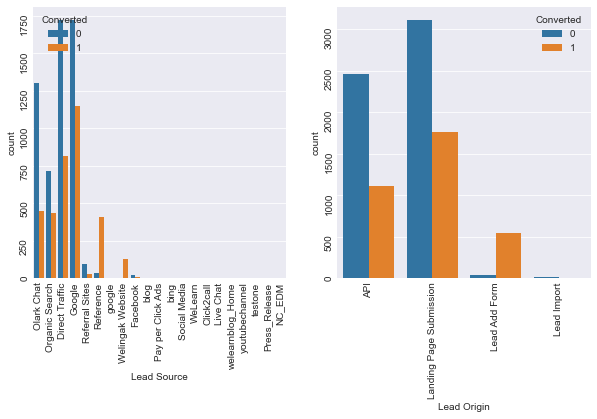

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

#let us check the source of the leads, i.e., 'Lead Source' column
sns.countplot(data['Lead Source'], hue=data.Converted,ax=ax[0])

#let us check the origin of the leads, i.e., 'Lead Origin' column
sns.countplot(data['Lead Origin'], hue=data.Converted,ax=ax[1])

for i in range(2):
    ax[i].tick_params(rotation=90)

plt.show()

#### Inference (Lead Source & Lead Origin):
###### Lead Source:
- The 'Lead Source' feature combines the leads obtained from various sources, but only a few like 'Olark Chat', 'Organic Search', 'Google' etc have high conversion rates. Therefore, it is safe to combine all the other lead source into a single entity.
- We will now replace the other lead source with the term 'Other_sources'.
- The Lead counts of 'Olark chat', 'Organic Search', 'Direct Traffic' and 'Google' are significant. But, the conversion rate of these channels with respect to their lead counts is quite low.
- Whereas, the 'Reference' and 'Welingak Website' channels have a high conversion rate but the lead count from these channels is low.

###### Lead Origin:
- In the 'Lead Origin' feature represents the origin of the leads from various point of origins.
- Out of the specified, the lead count from 'API' and 'Landing Page Submission' is maximum, but the conversion rates from these origins are not great.
- However, the conversion rate of the 'Lead Add Form' origin looks significant.

In [23]:
#replacing various less significant channels in 'Lead Source' feature with 'Other_sources'
others = ['bing','google','Click2call','Press_Release','Social Media',
          'Live Chat','youtubechannel','testone','Pay per Click Ads',
          'welearnblog_Home','WeLearn','blog','NC_EDM']
data['Lead Source'].replace(others,'Other_sources', inplace=True)

In [24]:
#also there are 2 channels in the name of google, let us handle this
data['Lead Source'].replace('google','Google', inplace=True)

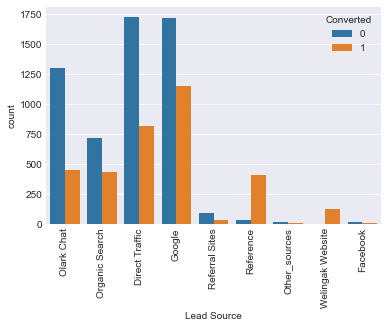

In [25]:
#let us have look again at the countplot of 'lead Source'
sns.countplot(data['Lead Source'], hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

#### Plan of action (Lead source & Lead origin):
##### Lead Source:
- We need to focus on increasing the lead conversion rate of the 'Olark Chat', 'Organic Search', 'Direct Traffic' and 'Google' channels.
- we need to focus on increasing the number of leads from the 'Reference' and 'Welingak Website' channels.

##### Lead Origin:
- we need to focus on improving the conversion rate in the 'API' and 'Landing Page Submission' point of origins.
- we need to focus on increasing the lead count from the 'Lead Add Form' point of origin.

### Exploring Website activity of Prospects (Total Visits, Total Time spent on website, Page Views Per Visit) :

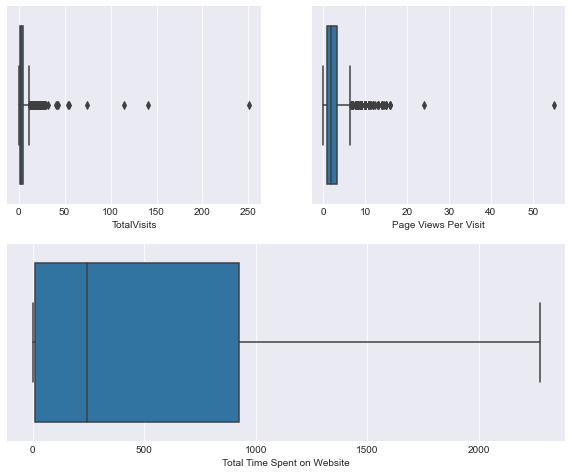

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

#plotting the 'Total Visits' Feature
sns.boxplot(data['TotalVisits'], ax=plt.subplot(2,2,1))
#plotting the 'Page Views per visit' column
sns.boxplot(data['Page Views Per Visit'], ax=plt.subplot(2,2,2))
#plotting the 'Total time spent on website' column
sns.boxplot(data['Total Time Spent on Website'], ax=plt.subplot(2,1,2))

plt.show()

###### Outlier Handling
- In the 'Total Visits' feature as well as the 'Page views per visit' feature there are too many outliers.
- Since there are too many we cannot drop them. These outliers have to be handled as they can affect out analysis.

In [27]:
#checking the quantiles
print(data.TotalVisits.quantile([0.5,0.75,0.90,0.95,0.99]))
print(data['Page Views Per Visit'].quantile([0.5,0.75,0.90,0.95,0.99]))

0.50     3.0
0.75     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64
0.50    2.0
0.75    3.2
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64


- The difference between the 95th and the 99th quantiles is huge in each case.

In [28]:
#let us cap the outliers in both the features at their respective 95th qauntiles
for i in ['TotalVisits','Page Views Per Visit']:
    q = data[i].quantile(0.95)
    data[i][data[i] > q] = q

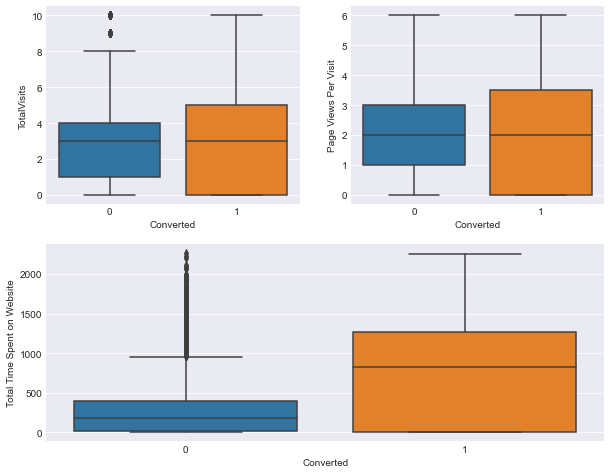

In [29]:
#let us plot the box plots again along with the target variable
fig, ax = plt.subplots(figsize=(10,8))

#plotting the 'Total Visits' Feature
sns.boxplot(y=data['TotalVisits'],x=data.Converted,ax=plt.subplot(2,2,1))
#plotting the 'Page Views per visit' column
sns.boxplot(y=data['Page Views Per Visit'],x=data.Converted,ax=plt.subplot(2,2,2))
#plotting the 'Total time spent on website' column
sns.boxplot(y=data['Total Time Spent on Website'],x=data.Converted,ax=plt.subplot(2,1,2))

plt.show()

#### Inference of Website activity of Prospects (Total Visits, Total Time spent on website, Page Views Per Visit) :

###### Total Visits & Page Views per Visit:
- Since the median in both of these features is nothing significant can be concluded from their plots

###### Total time spent on website:
- Here, the median of 'Converted' box plot is higher. This implies that the prospects that are spending more time on the website are more likely to convert into customers.

#### Plan of Action (Website activity of Prospects) :

###### Total Visits & Page Views per visit:
- No action recommended

###### Total time spent on website:
- According to the data, the since prospects that spend more time on the website are likely to convert, it is necessary to constantly improve the asthetics of the website, make it more user friendly and improve the user experience. This will make the users spend more time on the website and hence improve the chances of their convertion.

### Exploring the Last Activity feature:

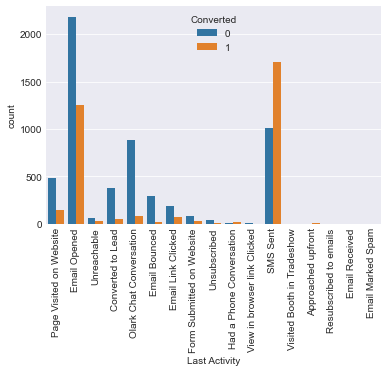

In [30]:
#last activity count plot
sns.countplot(data['Last Activity'], hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

- Here, it can be observed that there are various classes for whcih the conversion count is quite low.
- Let us group all of these classes into one so as to help our analysis.

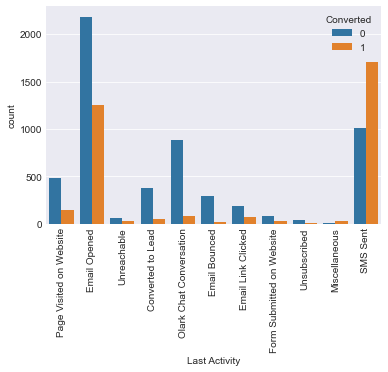

In [31]:
#grouping low count classes into 'Miscellaneous' class
low_counts = ['Had a Phone Conversation','View in browser link Clicked',
              'Visited Booth in Tradeshow', 'Approached upfront',
              'Resubscribed to emails','Email Received','Email Marked Spam']
data['Last Activity'].replace(low_counts, 'Miscellaneous', inplace=True)

#lets plot the feature again
sns.countplot(data['Last Activity'], hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference (Last Activity feature):
- The conversion rate of the prospects whose last activity was 'SMS Sent' is the highest.
- The number of prospects with last activity as 'Email Opened' is the highest.

#### Plan of Action:
- We should focus on increasing the number of prospects in the 'SMS Sent' class.
- We should focus on improving the conversion rate of the prospects in the 'Email Opened' class.

<b> Note :</b> The conversion rates in rest of the classes seems to be quite high, for example, in the 'Olark Chat Conversation' class. Therefore, these classes can also be focussed upon in order to increase the number of prospects in these classes and thus improving lead conversion rates.

### Exploring the demographics of the prospect (Specialization & occupation features):

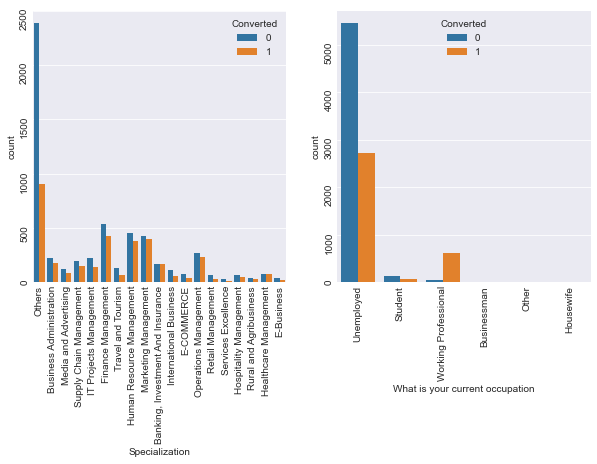

In [32]:
#plots of 'Specialization' & 'What is your current occupation' features:
fig, ax = plt.subplots(1,2,figsize=(10,5))
#'Specialization' plot
sns.countplot(data.Specialization,hue=data.Converted,ax=ax[0])
#'What is your current occupation' plot
sns.countplot(data['What is your current occupation'],
              hue=data.Converted, ax=ax[1])

for i in range(2):
    ax[i].tick_params(rotation=90)
plt.show()

#### Inference (prospect demographics):
###### Specialization:
- The covnersion rate of all prospects from various specializations seems to be fairly equal. Also, the prospect counts in most specializations also seem to be equal.
- Since there is an equal distribution of the prospect characteristics with respect to the Specialization column, nothing much can be inferred from this feature

###### Occupation:
- This distribution of this feature indicates that most prospects are from the 'Unemployed' category. However, the converstion rate of this category is only about 50%,
- While the number of prospects in the 'Working Professional' category in quite low, the converstion rate in the class is significant.
- Also, since the number of prospects as well as the conversion rate in the 'Students' category is quite low, this segment can be focussed upon in order increase the number of prospects from this segment.

#### Plan of Action (prospect demographics):
###### Specialization:
- No action can be recommended.

###### Occupation:
- Increase focus on improving the number of prospects from the 'Working professional' segment.
- Increase focus on improving the conversion rate of the prospects in the 'Unemployed' segment. 

### Exploring 'Lead Quality' feature:

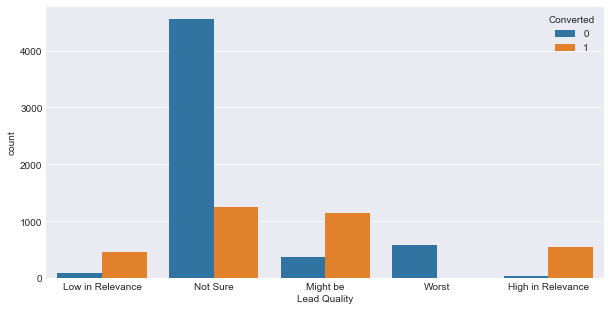

In [33]:
#plotting 'Lead Quality' feature:
plt.figure(figsize=(10,5))
sns.countplot(data['Lead Quality'],hue=data.Converted)
plt.show()

#### Inference (Lead Quality):
- The above visual presents that most prospects who were determined as the 'Not Sure' category have been converted.
- Even the 'Worst' and 'Might be Lead quality' categories have good conversion rates.

#### Plan of Action:
- from the above visual, it can be inferred that the people assigning these tags of 'Lead Quality' are not correctly assigning the tags. That is, it is possible that they are assigning the 'Not Sure' tag just to be on the safe side in case the lead doesn't convert. Therefore, well established mechanisms can be set forth by the comapny though which the employees can assign the tags to the prospects correctly.

### Exploring 'Tags' feature:

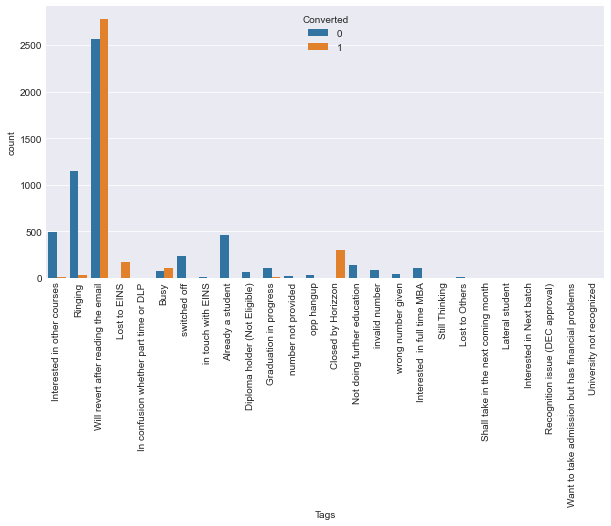

In [34]:
#plotting 'Tags'
plt.figure(figsize=(10,5))
sns.countplot(data.Tags,hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

- Since several tags do not have any significant numbers, let us group them into one 'Miscellaneous_tags' group.

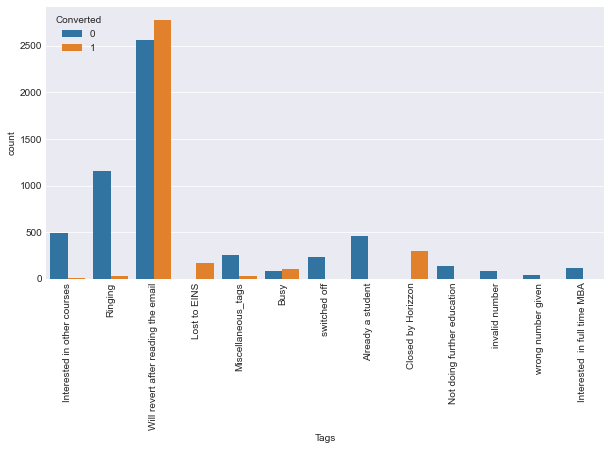

In [35]:
#grouping into insignificant classes into 'Miscellaneous_tags':
data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                      'Diploma holder (Not Eligible)','Approached upfront',
                      'Graduation in progress','number not provided','opp hangup',
                      'Still Thinking','Lost to Others',
                      'Shall take in the next coming month','Lateral student',
                      'Interested in Next batch','Recognition issue (DEC approval)',
                      'Want to take admission but has financial problems',
                      'University not recognized'], 'Miscellaneous_tags', inplace=True)

#let us plot the 'Tags' features again
plt.figure(figsize=(10,5))
sns.countplot(data.Tags,hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference (Tags):
- From the above visual, it can be inferred that the 'Will revert after reading the email', 'Lost to ENS' and the 'Closed by Horizon' tags have conversion rates.

#### Plan of Action:
- The number of prospects in the 'Will revert after reading the email', 'Lost to ENS' and the 'Closed by Horizon' category can be increased in order to increase the number of conversions.

### Exploring the Last Notable Activity feature:

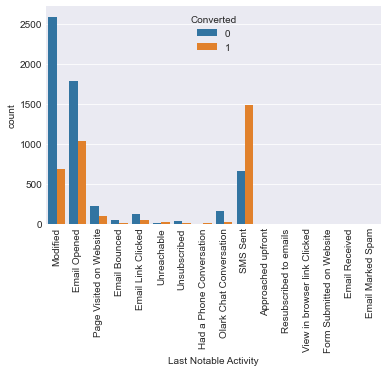

In [36]:
sns.countplot(data['Last Notable Activity'], hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

#### Inference (Last Notable Activity) :
- Here, it can be observed that the converstion rate prospects in the 'SMS Sent' category ig high.
- Moreover, the count of prospects in the 'Email Opened' and the 'Modified' categories is significant.

#### Plan of Action:
- We should focus on increasing the count of prospects in the 'SMS sent' segment.
- We should try to improve the convertion rate in the 'Modified' and 'Email Opened' segments.

### Exploring other remaining features:

In [37]:
#let us now look at other demographic features like 'Country' & 'City'
other_demographs = ['Country','City']

for feature in other_demographs:
    print(round(100*(data[feature].value_counts(normalize=True)),2))
    print('**'*32)

India                   96.84
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.17
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.07
France                   0.07
unknown                  0.06
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

- In the above output it can be observed that in the 'City' and 'Country' features the class imbalance is very high. Therefore, there is no significant information that these features can provide.

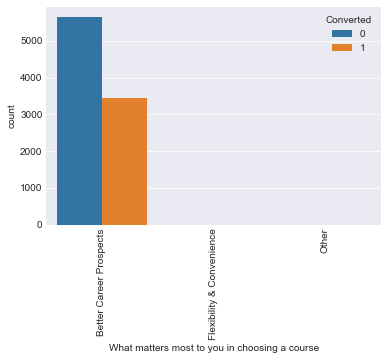

In [38]:
#plotting 'What matters most to you in choosing a course' feature
sns.countplot(data['What matters most to you in choosing a course'],
             hue=data.Converted)
plt.xticks(rotation=90)
plt.show()

#### Note:
- 'What matters most to you in choosing a course' feature too has high class imbalance and cannot provide any information. And hence, this feature can be ignored.
- The remaining features like "Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview" can also be ignored since the data in all of these features is mostly 'No' as seen in the 'Encoding Binary Categorical variables' step.

In [39]:
# now there are several unnecessary columns which can be droped from the dataset
unnecessary = ['Lead Number','What matters most to you in choosing a course',
               'Search','Magazine','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque',
               'A free copy of Mastering The Interview','Country','Do Not Call']
data.drop(unnecessary,1,inplace=True)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Step-5: Building the Model

### Dummy Variable Creation:

In [40]:
#create dummies for each categorical feature in dataframe and drop first column
dummy_variable_list = ['Lead Origin','Lead Source','Last Activity',
                       'Specialization','What is your current occupation',
                       'Tags','Lead Quality','City','Last Notable Activity']
dummies = pd.get_dummies(data[dummy_variable_list], drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
#drop original variables and concatenate the dummies
data.drop(dummy_variable_list,axis=1,inplace=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train-Test Split:

- Before we proceed to split the dataset, we need to drop the `'Prospect Id'` column. This is just a variable that uniquely identifies the prospect and hence is insignificant in our analysis.
- Prior to this step, in the EDA Process we are not supposed to drop any data from the dataframe without valid reason. Hence, we will now drop the feature in the train-test split.

In [42]:
#splitting the dataframe into train and test
# X = input variables
X = data.drop(['Prospect ID', 'Converted'], axis=1)
# y = output variables
y = data['Converted']

In [43]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
#Conversion Rate
print('Conversion Rate = ',(100*sum(y)/len(y)))

Conversion Rate =  37.85541106458012


In [45]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,
                                                    random_state=42)

### Feature Scaling:

- Now since not all of the numerical values are on the same scale, we need to scale them in order to bring all the values to the same scale.

In [46]:
#feature scaling
scaler = StandardScaler()
features_to_scale = ['TotalVisits','Total Time Spent on Website',
                     'Page Views Per Visit']

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,-0.432839,1.704380,-0.147676,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,-0.432839,-0.789845,-0.147676,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6547,0,0.644762,-0.176811,1.544362,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8836,0,0.285562,2.117949,0.980349,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6529,0,0.644762,0.315446,1.544362,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- Now, let us look at the correlations between different variable in our dataframe.
- But, since there are significant number of variables(84) it will be easier if we just look at the top 15 correlations pairs with the highest correlation of them all.

### Correlation:

In [47]:
#correlation matrix
data_corr = data.corr()
data_corr

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.140786,0.001856,-0.046192,0.022891,0.099661,-0.031468,-0.016857,-0.017137,-0.071484,...,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Converted,-0.140786,1.000000,0.050742,0.359261,0.000329,-0.037481,0.300775,-0.009328,-0.010651,0.029960,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.001856,0.050742,1.000000,0.361207,0.766567,0.454350,-0.276775,-0.060592,-0.059061,0.216423,...,-0.004500,0.029602,-0.156790,-0.061780,0.196995,-0.012052,0.021815,0.015285,0.010927,0.018154
Total Time Spent on Website,-0.046192,0.359261,0.361207,1.000000,0.364735,0.292571,-0.188526,-0.050742,-0.050248,0.215390,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.022891,0.000329,0.766567,0.364735,1.000000,0.554142,-0.308881,-0.066440,-0.063534,0.261523,...,-0.001559,0.017523,-0.119536,-0.100512,0.033128,-0.013283,0.071517,0.021695,0.024119,0.002369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,-0.003073,0.013451,-0.012052,-0.009298,-0.013283,-0.011337,-0.002746,-0.000605,-0.000615,-0.007137,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,-0.029608,0.360233,0.021815,0.137169,0.071517,0.052736,0.115585,-0.027600,-0.023765,-0.001771,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,-0.010516,0.037893,0.015285,0.009594,0.021695,-0.000847,0.007222,-0.003426,-0.003483,0.011539,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,0.241202,-0.016286,0.010927,0.003951,0.024119,0.018171,-0.018465,-0.004066,-0.004133,-0.000753,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


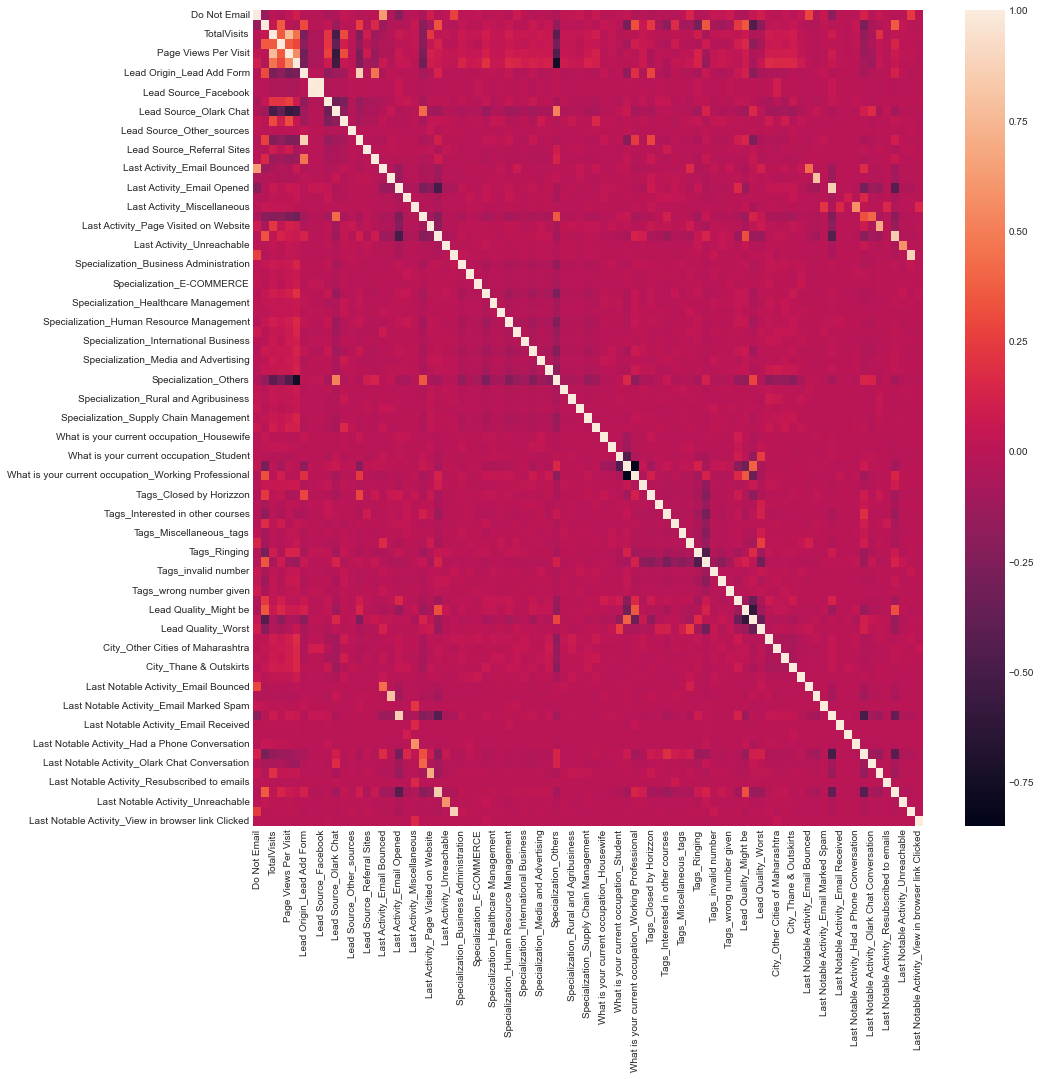

In [48]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data_corr)
plt.show()

- As it can be observed, there are 84 columns in the data, which make it hard for us to determine the hihgly correlated features in the dataset with the Correlation matrix or the plot.
- Hence, we will not create a function that will take a correlation matrix and return the columns with correlation above a certain designated Threshold.

In [49]:
#function to return highly correlated column above a threshold
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [50]:
#let us get the features with correlation above 85%
corr_features = correlation(X_train,0.85)
corr_features

{'Last Notable Activity_Email Opened',
 'Last Notable Activity_SMS Sent',
 'Lead Source_Facebook',
 'Lead Source_Reference'}

- Now, let us remove these features from the X_train and X_test.

In [51]:
#dropping higly correlated features
X_train.drop(list(corr_features),axis=1,inplace=True)
X_test.drop(list(corr_features),axis=1,inplace=True)

In [52]:
#let us look at the dataframe again for highly correlated features
corr_features = correlation(X_train,0.85)
corr_features

set()

- As it can be observed, there no highly correlated features now

### Model Creation:

In [53]:
#logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.0
Date:                Mon, 23 May 2022   Deviance:                       2588.1
Time:                        23:16:58   Pearson chi2:                 2.81e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6323      1.930     -0.846      0.398      -5.414       2.150
Do Not Email                                            -1.0766      0.294     -3.660      0.000      -1.653      -0.500
TotalVisits                                              0.2304      0.085      2.724      0.006       0.065       0.396
Total Time Spent on Website                              1.1187      0.062     17.956      0.000       0.997       1.241
Page Views Per Visit                                    -0.2501      0.097     -2.584      0.010      -0.440      -0.060
Lead Origin_Landing Page Submission                     -0.5867      0.219     -2.680      0.007      -1.016      -0.158
Lead Origin_Lead Add Form                                1.5982      0.423      3.780      0.000       0.769       2.427
Lead Origin_Lead Import                                  1.3769      0.828      1.664      0.096      -0.245       2.999
Lead Source_Google                                       0.0635      0.152      0.417      0.677      -0.235       0.362
Lead Source_Olark Chat                                   0.9303      0.230      4.050      0.000       0.480       1.381
Lead Source_Organic Search                               0.2054      0.200      1.025      0.305      -0.187       0.598
Lead Source_Other_sources                               -0.0088      0.837     -0.010      0.992      -1.648       1.631
Lead Source_Referral Sites                              -0.1451      0.454     -0.320      0.749      -1.034       0.744
Lead Source_Welingak Website                             4.0331      1.082      3.726      0.000       1.912       6.155
Last Activity_Email Bounced                             -1.5803      0.986     -1.603      0.109      -3.513       0.352
Last Activity_Email Link Clicked                         0.7524      0.623      1.208      0.227      -0.468       1.973
Last Activity_Email Opened                              -0.3763      0.367     -1.025      0.305      -1.096       0.343
Last Activity_Form Submitted on Website                  0.6598      0.588      1.122      0.262      -0.493       1.813
Last Activity_Miscellaneous                              0.8188      1.184      0.692      0.489      -1.502       3.140
Last Activity_Olark Chat Conversation                   -0.2354      0.397     -0.592      0.554      -1.014       0.543
Last Activity_Page Visited on Website                    0.0025      0.468      0.005      0.996      -0.916       0.921
Last Activity_SMS Sent                                   1.6346      0.360      4.543      0.000       0.929       2.340
Last Activity_Unreachable                                0

### Feature selection using RFE:

In [54]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Other_sources', False, 55),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 25),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Miscellaneous', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 24),
 ('Last Activity_Page Visited on Website', False, 48),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 12),
 ('Last Activity_Unsubscribed', False, 45),
 

In [55]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels:

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.2
Date:                Mon, 23 May 2022   Deviance:                       3118.5
Time:                        23:17:06   Pearson chi2:                 2.34e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3119      0.215     -6.094      0.000      -1.734      -0.890
Do Not Email                                            -1.1447      0.217     -5.270      0.000      -1.570      -0.719
Lead Origin_Lead Add Form                                0.8073      0.354      2.281      0.023       0.114       1.501
Lead Source_Welingak Website                             3.9143      1.077      3.633      0.000       1.803       6.026
Last Activity_SMS Sent                                   2.0397      0.103     19.873      0.000       1.839       2.241
What is your current occupation_Working Professional     1.1844      0.299      3.956      0.000       0.598       1.771
Tags_Busy                                                3.7912      0.318     11.923      0.000       3.168       4.414
Tags_Closed by Horizzon                                  8.2458      0.775     10.637      0.000       6.726       9.765
Tags_Lost to EINS                                        9.4877      0.765     12.403      0.000       7.988      10.987
Tags_Ringing                                            -1.6836      0.317     -5.304      0.000      -2.306      -1.061
Tags_Will revert after reading the email                 3.5987      0.227     15.825      0.000       3.153       4.044
Tags_invalid number                                    -22.0628   1.34e+04     -0.002      0.999   -2.64e+04    2.63e+04
Tags_switched off                                       -2.7120      0.648     -4.182      0.000      -3.983      -1.441
Lead Quality_Not Sure                                   -3.3731      0.132    -25.471      0.000      -3.633      -3.114
Lead Quality_Worst                                      -3.8942      0.817     -4.766      0.000      -5.496      -2.293
Last Notable Activity_Modified                          -1.4851      0.107    -13.915      0.000      -1.694      -1.276
========================================================================================================================
"""

In [57]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.001712
456     0.071004
6547    0.013011
8836    0.002087
6529    0.995974
7798    0.066282
2349    0.001712
5057    0.998759
3954    0.000545
4523    0.986959
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.71154611e-03, 7.10040578e-02, 1.30105645e-02, 2.08668105e-03,
       9.95974194e-01, 6.62823052e-02, 1.71154611e-03, 9.98759093e-01,
       5.45473429e-04, 9.86959391e-01])

##### Creating a dataframe with the actual Convert flag and the predicted probabilities:

In [59]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.001712,1943
1,0,0.071004,456
2,0,0.013011,6547
3,0,0.002087,8836
4,1,0.995974,6529


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(
    lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.001712,1943,0
1,0,0.071004,456,0
2,0,0.013011,6547,0
3,0,0.002087,8836,0
4,1,0.995974,6529,1


In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert,
                                     y_train_pred_final.predicted )
print(confusion)

[[3831  146]
 [ 369 2005]]


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, 
                             y_train_pred_final.predicted))

0.9189104078097937


###### Checking VIFs

In [63]:
# Create a dataframe that will contain the names of all the feature 
## variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,3.20
9,Tags_Will revert after reading the email,2.89
14,Last Notable Activity_Modified,1.64
3,Last Activity_SMS Sent,1.60
1,Lead Origin_Lead Add Form,1.58
8,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.35
4,What is your current occupation_Working Profes...,1.26
6,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.13


- Here, all variables have a good value of VIF.
- However, we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.

In [64]:
col = col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

##### Rebuilding the model

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1563.8
Date:                Mon, 23 May 2022   Deviance:                       3127.6
Time:                        23:17:06   Pearson chi2:                 2.34e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4414      0.216     -6.688      0.000      -1.864      -1.019
Do Not Email                                            -1.1390      0.217     -5.256      0.000      -1.564      -0.714
Lead Origin_Lead Add Form                                0.8284      0.355      2.334      0.020       0.133       1.524
Lead Source_Welingak Website                             3.8922      1.078      3.612      0.000       1.780       6.004
Last Activity_SMS Sent                                   2.0185      0.102     19.775      0.000       1.818       2.219
What is your current occupation_Working Professional     1.2066      0.301      4.004      0.000       0.616       1.797
Tags_Busy                                                3.9251      0.317     12.378      0.000       3.304       4.547
Tags_Closed by Horizzon                                  8.3592      0.775     10.780      0.000       6.839       9.879
Tags_Lost to EINS                                        9.6066      0.766     12.548      0.000       8.106      11.107
Tags_Ringing                                            -1.5393      0.316     -4.871      0.000      -2.159      -0.920
Tags_Will revert after reading the email                 3.7255      0.227     16.380      0.000       3.280       4.171
Tags_switched off                                       -2.5643      0.648     -3.960      0.000      -3.834      -1.295
Lead Quality_Not Sure                                   -3.3669      0.132    -25.483      0.000      -3.626      -3.108
Lead Quality_Worst                                      -3.9237      0.814     -4.820      0.000      -5.519      -2.328
Last Notable Activity_Modified                          -1.4745      0.107    -13.840      0.000      -1.683      -1.266
========================================================================================================================
"""

In [66]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.001748,1943,0
1,0,0.071939,456,0
2,0,0.013008,6547,0
3,0,0.001865,8836,0
4,1,0.995967,6529,1


In [67]:
# Let's check the overall accuracy.
print("Accuracy score",
      metrics.accuracy_score(y_train_pred_final.Convert,
                             y_train_pred_final.predicted))

Accuracy score 0.91828058573453


- The Accuracy did not drop much

##### Checking the VIFs again:

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)
              for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,3.13
9,Tags_Will revert after reading the email,2.84
13,Last Notable Activity_Modified,1.64
1,Lead Origin_Lead Add Form,1.58
3,Last Activity_SMS Sent,1.58
8,Tags_Ringing,1.54
2,Lead Source_Welingak Website,1.35
4,What is your current occupation_Working Profes...,1.25
6,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.13


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Evaluating the model:

In [69]:
# function to print Confusion matrix, accuracy, Sensitivity, Specificity,
## False Positive Rate, Positive Predictive Value and returns accuracy, 
## Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score,specificity_score,precision_sc

In [70]:
#implementing the function on the model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted,
               print_score=True)

Confusion Matrix :
 [[3829  148]
 [ 371 2003]]
Accuracy : 0.91828058573453
Sensitivity : 0.8437236731255265
Specificity : 0.9627860196127734
Precision : 0.9311947931194793


(0.91828058573453, 0.8437236731255265, 0.9627860196127734, 0.9311947931194793)

### Plotting the ROC Curve:

- In ROC Curve, the more area under the curve means the more accurate is the test.

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert,
                                         y_train_pred_final.Convert_Prob,
                                         drop_intermediate = False )

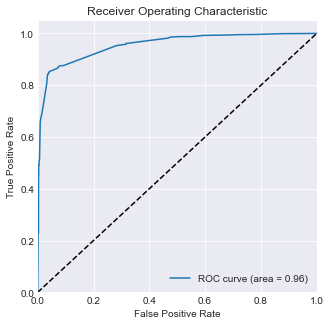

In [73]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding optimal cut-off point:

In [74]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(
        lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001748,1943,0,1,0,0,0,0,0,0,0,0,0
1,0,0.071939,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013008,6547,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001865,8836,0,1,0,0,0,0,0,0,0,0,0
4,1,0.995967,6529,1,1,1,1,1,1,1,1,1,1,1


In [75]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.373799,1.000000,0.000000,0.373799
0.1,0.1,0.792789,0.956613,0.694996,0.651837
0.2,0.2,0.805857,0.952822,0.718129,0.668637
0.3,0.3,0.905369,0.866891,0.928338,0.878361
0.4,0.4,0.919068,0.852570,0.958763,0.925046
0.5,0.5,0.918281,0.843724,0.962786,0.931195
0.6,0.6,0.917966,0.842039,0.963289,0.931935
0.7,0.7,0.906786,0.804549,0.967815,0.937193
0.8,0.8,0.870257,0.671019,0.989188,0.973716
0.9,0.9,0.862384,0.647009,0.990948,0.977099


###### specificity-sensitivity-accuracy plot:

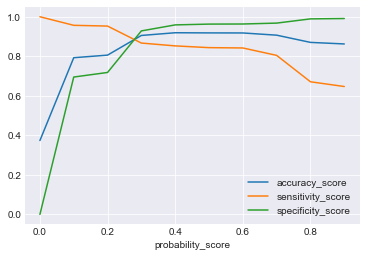

In [76]:
df.plot.line(x='probability_score',
             y=['accuracy_score','sensitivity_score',
                'specificity_score'])
plt.show()

- From the above graph, 0.275 seems like a goof cut-off probability.

##### Precision-Recall trade off:

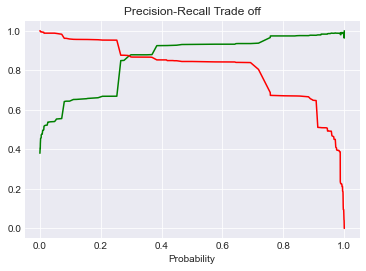

In [77]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Convert,
                                        y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

- Here too, 0.275 looks like an optimal cut-off.

###### Hence, we will now be taking 0.275 as the optimal cut-off probablity

In [78]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(
    lambda x: 1 if x > 0.275 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(
    lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.001748,1943,0,0
1,0,0.071939,456,0,7
2,0,0.013008,6547,0,1
3,0,0.001865,8836,0,0
4,1,0.995967,6529,1,100


In [79]:
# Evaluating model performance on training data
evaluate_model(y_train_pred_final.Convert,
               y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3610  367]
 [ 294 2080]]
Accuracy : 0.8959219020626673
Sensitivity : 0.8761583824768323
Specificity : 0.9077193864722153
Precision : 0.85002043318349


(0.8959219020626673, 0.8761583824768323, 0.9077193864722153, 0.85002043318349)

In [80]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,465,0.071939,0,7
1,0,5424,0.001069,0,0
2,0,3503,0.001069,0,0
3,0,4465,0.001865,0,0
4,0,5394,0.071939,0,7


In [81]:
# Evaluating model performance on test data
evaluate_model(y_predicted_final.Converted,
               y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1493  169]
 [ 123  938]]
Accuracy : 0.8927653323540213
Sensitivity : 0.884071630537229
Specificity : 0.898315282791817
Precision : 0.8473351400180669


(0.8927653323540213, 0.884071630537229, 0.898315282791817, 0.8473351400180669)

### Final Model:

In [82]:
# a function to build the logistic regression model and return predicted
## values on training data, given the training data, test data and 
### probability cut-off

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [83]:
build_model_cutoff(X_train[col], y_train, X_test[col],
                   y_test, cutoff=0.275)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1943          0             0.001748                  0           0
1          456          0             0.071939                  0           7
2         6547          0             0.013008                  0           1
3         8836          0             0.001865                  0           0
4         6529          1             0.995967                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          465          0             0.071939                  0           7
1         5424          0             0.001069                  0           0
2         3503          0             0.001069                  0           0
3         4465          0             0.001865                  0           0
4         5394          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,465,0,0.071939,0,7
1,5424,0,0.001069,0,0
2,3503,0,0.001069,0,0
3,4465,0,0.001865,0,0
4,5394,0,0.071939,0,7
...,...,...,...,...,...
2718,3436,1,0.252974,0,25
2719,1621,0,0.071939,0,7
2720,7665,0,0.001069,0,0
2721,7274,0,0.252974,0,25


In [84]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.441357
Do Not Email                                           -1.139049
Lead Origin_Lead Add Form                               0.828411
Lead Source_Welingak Website                            3.892221
Last Activity_SMS Sent                                  2.018540
What is your current occupation_Working Professional    1.206551
Tags_Busy                                               3.92506

### Conclusion:
- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.
- Here, the logistic regression model is used to predict the probabilty of conversion of a customer.
- Optimum cut off is chosen to be 0.275 i.e. any lead with greater than 0.275 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.275 or less probability of converting is predicted as Cold Lead (customer will not convert)
- Our final Logistic Regression Model is built with 14 features.
- Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified',]
- The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Tags_Busy’ with respect to the absolute value of their coefficient factors.
- ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Tags_Busy’ are obtained by encoding original categorical variable ‘Tags’.
- Tags_Lost to EINS (Coefficient factor = 9.606615)
- Tags_Closed by Horizzon (Coefficient factor = 8.359193)
- Tags_Busy (Coefficient factor = 3.925069)
- The final model has Sensitivity of 0.884, this means the model is able to predict 88% customers out of all the converted customers, (Positive conversion) correctly.
- The final model has Precision of 0.847, this means 84% of predicted hot leads are True Hot Leads.

# Subjective Questions

`
3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.
`

- In this scenario, we are trying to convert all the leads possible. That is, we need to maximize the conversion rate.
- To counter this, the cut off probability to our model building funtion should be 0.1. Because, at this point we are maximizing the Recall(True positive rate) is maximum but we might be compromising Precision too.

In [85]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test,
                   cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1943          0             0.001748                  0           0
1          456          0             0.071939                  0           7
2         6547          0             0.013008                  0           1
3         8836          0             0.001865                  0           0
4         6529          1             0.995967                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          465          0             0.071939                  0           7
1         5424          0             0.001069                  0           0
2         3503          0             0.001069                  0           0
3         4465          0             0.001865                  0           0
4         5394          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,465,0,0.071939,0,7
1,5424,0,0.001069,0,0
2,3503,0,0.001069,0,0
3,4465,0,0.001865,0,0
4,5394,0,0.071939,0,7
...,...,...,...,...,...
2718,3436,1,0.252974,1,25
2719,1621,0,0.071939,0,7
2720,7665,0,0.001069,0,0
2721,7274,0,0.252974,1,25


`
4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.
`

- In this scenario, we are trying to convert as many leads as possible without costing too much resources, that is making too many unnecessary phone calls.
- Therefore, the probable cut-off in this case would be 0.9 since at this point though we would be compromising on the True Positive Rate(Recall), the precision and accuracy metrics are almost maximum.

In [86]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test,
                   cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1943          0             0.001748                  0           0
1          456          0             0.071939                  0           7
2         6547          0             0.013008                  0           1
3         8836          0             0.001865                  0           0
4         6529          1             0.995967                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0          465          0             0.071939                  0           7
1         5424          0             0.001069                  0           0
2         3503          0             0.001069                  0           0
3         4465          0             0.001865                  0           0
4         5394          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,465,0,0.071939,0,7
1,5424,0,0.001069,0,0
2,3503,0,0.001069,0,0
3,4465,0,0.001865,0,0
4,5394,0,0.071939,0,7
...,...,...,...,...,...
2718,3436,1,0.252974,0,25
2719,1621,0,0.071939,0,7
2720,7665,0,0.001069,0,0
2721,7274,0,0.252974,0,25
